In [1]:
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Activity 1: Missing values

In [244]:
data = pd.read_csv('house_prices.csv')

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [246]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [52]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)

missing_data[missing_data.count_missing > 0]

,count_missing,perc_missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


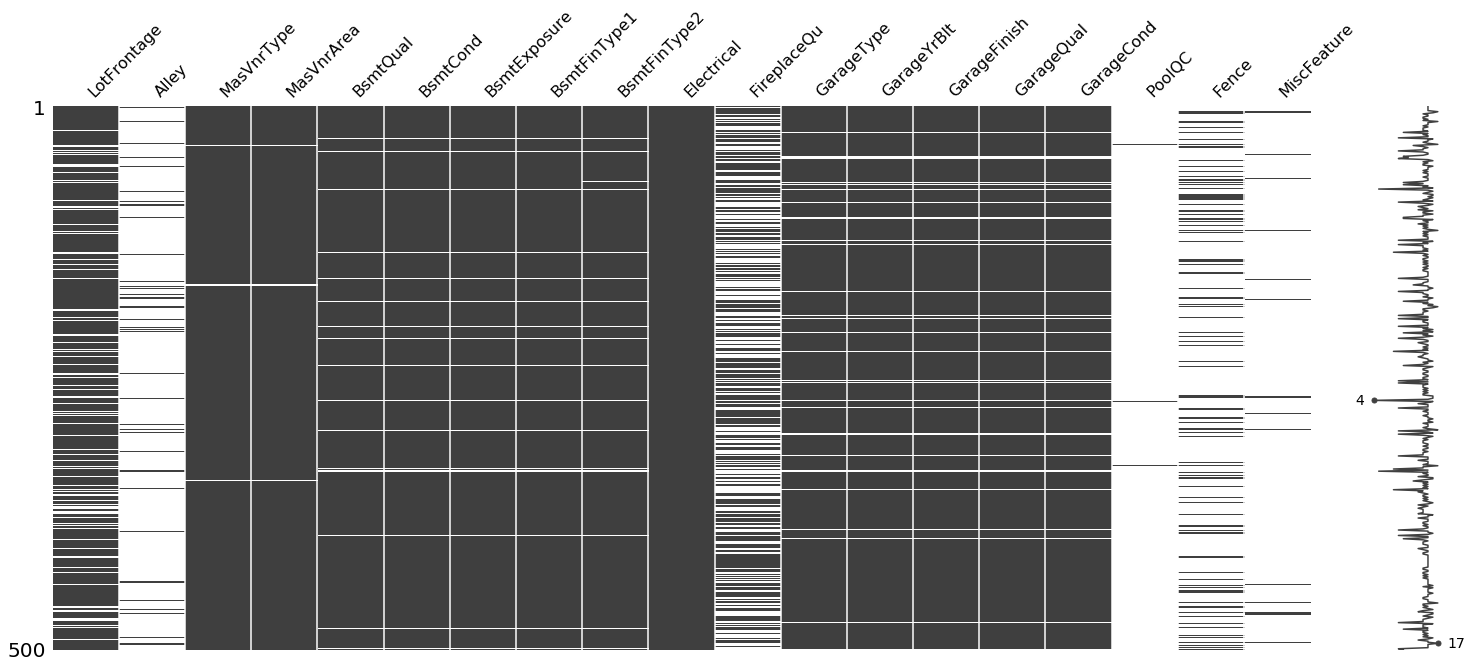

In [18]:
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns].sample(500))
plt.show()

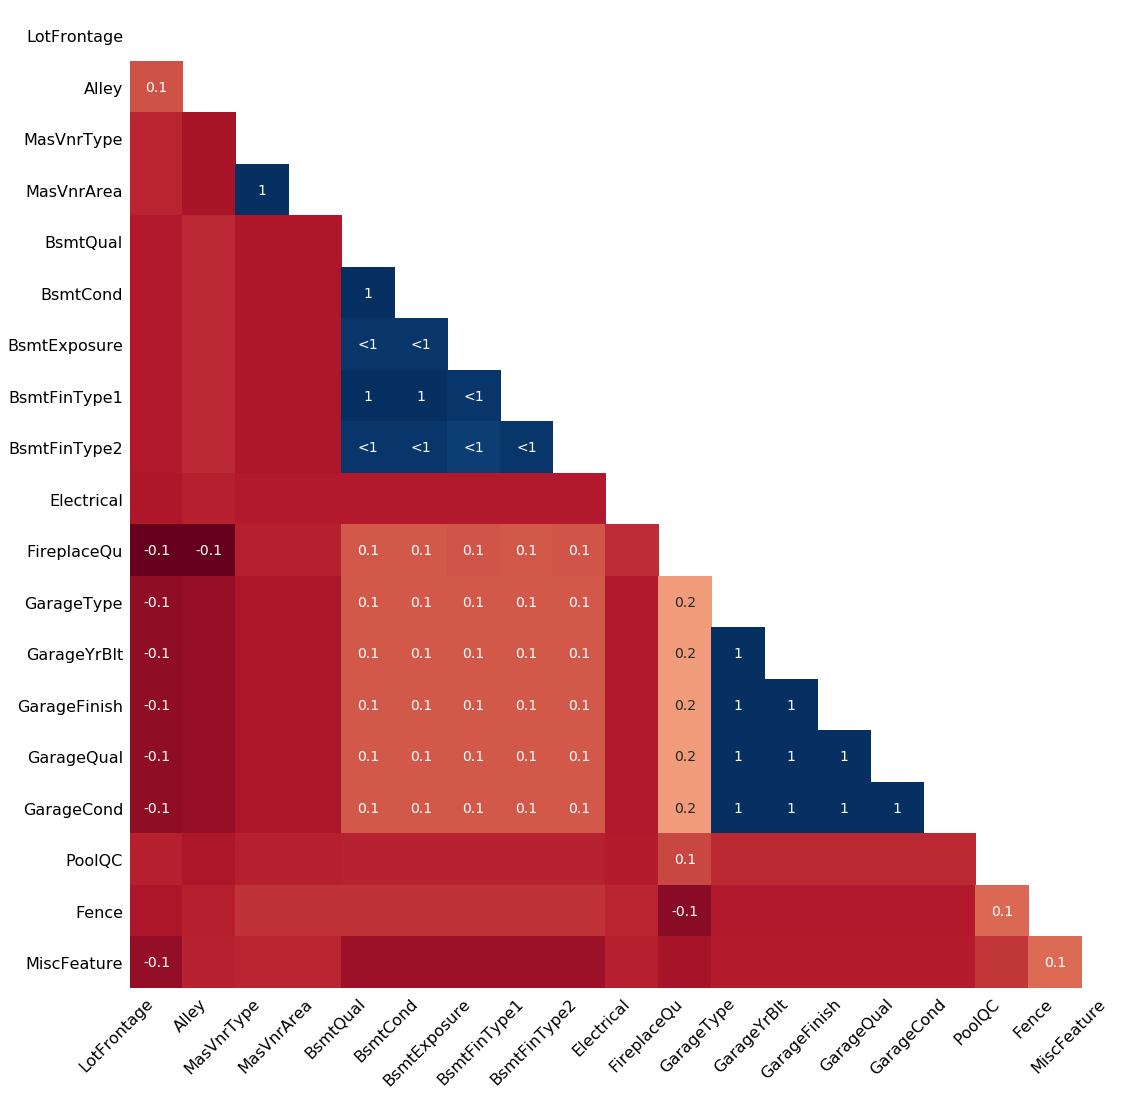

In [19]:
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()

In [74]:
data = data.loc[:,missing_data[missing_data.perc_missing < 80].index]

In [77]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')

# Activity 2: Distribution of Values 

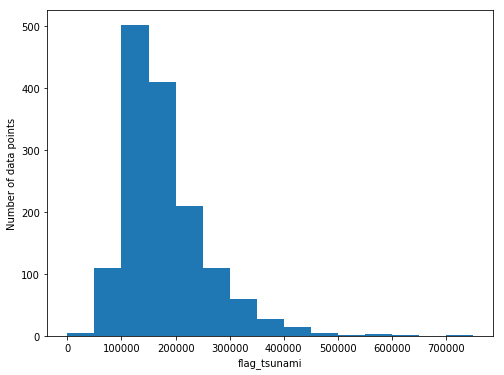

In [137]:
plt.figure(figsize=(8,6))

plt.hist(data.SalePrice, bins=range(0,800000,50000))

plt.ylabel('Number of data points')
plt.xlabel('flag_tsunami')
plt.show()

In [185]:
object_variables = data.select_dtypes(include=[np.object])
object_variables.nunique().sort_values()

CentralAir        2
Street            2
Utilities         2
GarageFinish      3
LandSlope         3
PavedDrive        3
LotShape          4
LandContour       4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtCond          4
BsmtQual          4
BsmtExposure      4
Electrical        5
GarageCond        5
GarageQual        5
LotConfig         5
ExterCond         5
BldgType          5
MSZoning          5
HeatingQC         5
BsmtFinType1      6
Foundation        6
RoofStyle         6
Heating           6
SaleCondition     6
BsmtFinType2      6
GarageType        6
FireplaceQu       6
Functional        7
HouseStyle        8
Condition2        8
RoofMatl          8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [186]:
counts = data.HouseStyle.value_counts(dropna=False)
counts.reset_index().sort_values(by='index')

,index,HouseStyle
2,1.5Fin,154
5,1.5Unf,14
0,1Story,726
7,2.5Fin,8
6,2.5Unf,11
1,2Story,445
4,SFoyer,37
3,SLvl,65


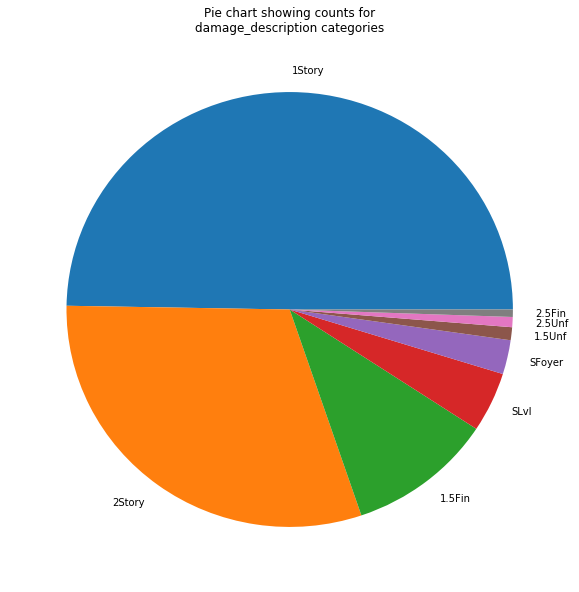

In [187]:
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index)
plt.title('Pie chart showing counts for\ndamage_description categories')
plt.show()

In [188]:
numeric_variables = data.select_dtypes(include=[np.number])
numeric_variables.nunique().sort_values(ascending=False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
MSSubClass         15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
OverallCond         9
PoolArea            8
BedroomAbvGr        8
YrSold              5
GarageCars          5
BsmtFullBath        4
FullBath            4
KitchenAbvGr        4
Fireplaces          4
BsmtHalfBath        3
HalfBath            3
dtype: int64

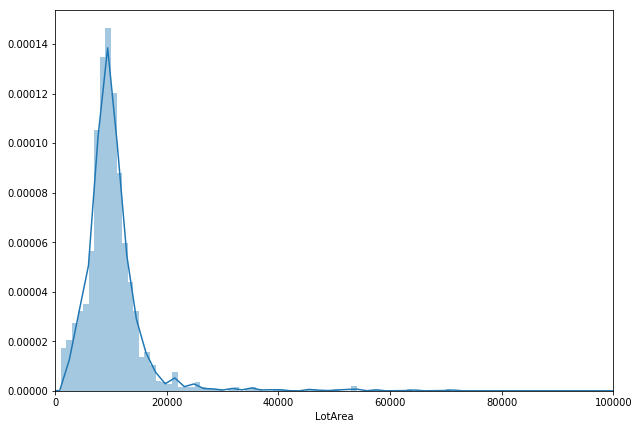

In [197]:
plt.figure(figsize=(10,7))
sns.distplot(data.LotArea.dropna(), , bins=range(0,100000,1000))
plt.xlim(0,100000)
plt.show()

In [198]:
data.skew().sort_values()

GarageYrBlt      -0.649415
YearBuilt        -0.613461
YearRemodAdd     -0.503562
GarageCars       -0.342549
Id                0.000000
FullBath          0.036562
YrSold            0.096269
GarageArea        0.179981
BedroomAbvGr      0.211790
MoSold            0.212053
OverallQual       0.216944
BsmtFullBath      0.596067
Fireplaces        0.649565
HalfBath          0.675897
TotRmsAbvGrd      0.676341
OverallCond       0.693067
2ndFlrSF          0.813030
BsmtUnfSF         0.920268
GrLivArea         1.366560
1stFlrSF          1.376757
MSSubClass        1.407657
TotalBsmtSF       1.524255
WoodDeckSF        1.541376
BsmtFinSF1        1.685503
SalePrice         1.882876
LotFrontage       2.163569
OpenPorchSF       2.364342
MasVnrArea        2.669084
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
M

In [199]:
data.kurt()

LotFrontage       17.452867
GarageYrBlt       -0.418341
MasVnrArea        10.082417
Id                -1.200000
Fireplaces        -0.217237
KitchenAbvGr      21.532404
BedroomAbvGr       2.230875
HalfBath          -1.076927
FullBath          -0.857043
BsmtHalfBath      16.396642
TotRmsAbvGrd       0.880762
GarageCars         0.220998
GrLivArea          4.895121
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1.190601
BsmtFullBath      -0.839098
LowQualFinSF      83.234817
OverallQual        0.096293
YearBuilt         -0.439552
LotArea          203.243271
OverallCond        1.106413
YearRemodAdd      -1.272245
2ndFlrSF          -0.553464
BsmtFinSF2        20.113338
1stFlrSF           5.745841
MSSubClass         1.580188
TotalBsmtSF       13.250483
BsmtUnfSF          0

# Activity 3: Relationships within data

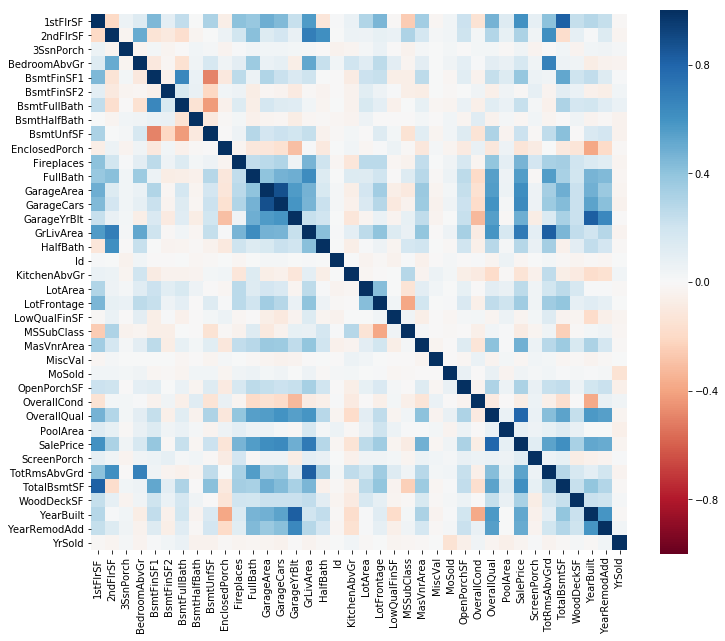

In [205]:
plt.figure(figsize = (12,10))
sns.heatmap(data[sorted(data.columns)].corr(), square=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [218]:
feature_subset = [
    'GarageArea', 'GarageCars','GarageCond','GarageFinish','GarageQual','GarageType',
    'GarageYrBlt','GrLivArea','LotArea','MasVnrArea','SalePrice'
]

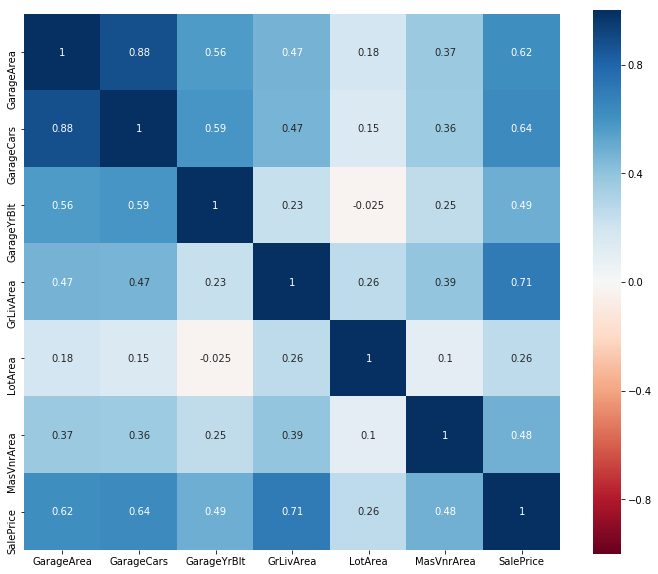

In [219]:
plt.figure(figsize = (12,10))
sns.heatmap(data[feature_subset].corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

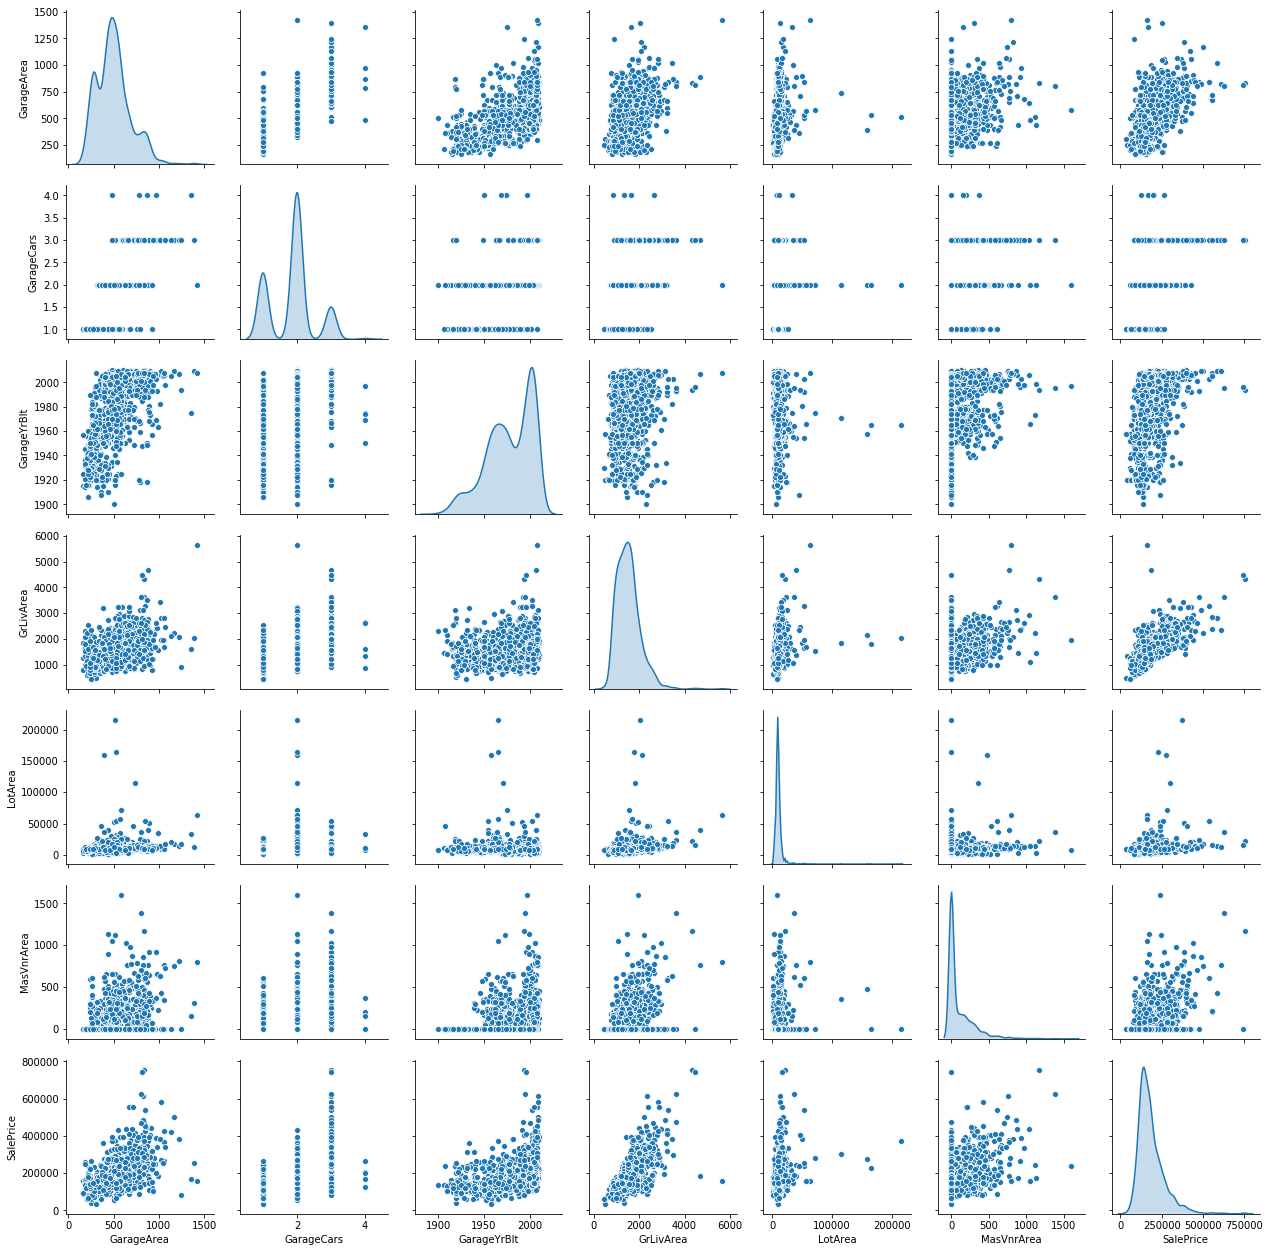

In [220]:
sns.pairplot(data[feature_subset].dropna(), kind ='scatter', diag_kind='kde')
plt.show()

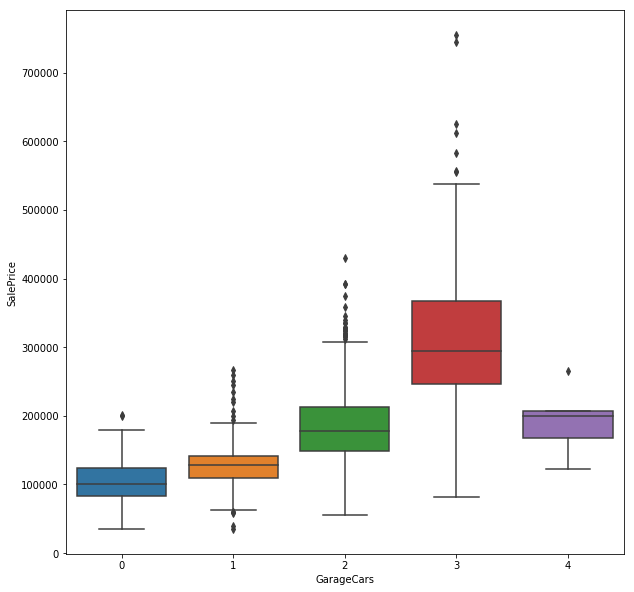

In [224]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='GarageCars', y="SalePrice", data=data)
plt.show()

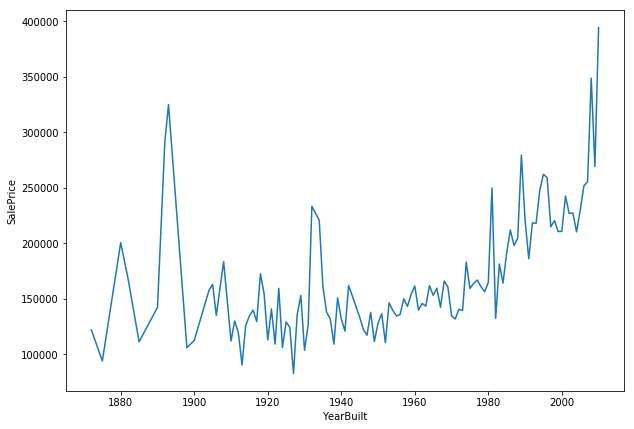

In [249]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data.YearBuilt, y=data.SalePrice, ci=None)
plt.show()